Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
#import warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size,
                                                                               image_size=(img_height,img_width),
                                                                                label_mode='categorical',seed=123)

Found 2239 files belonging to 9 classes.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_test,batch_size=batch_size,
                                                                               image_size=(img_height,img_width),
                                                                                label_mode='categorical',seed=123)

Found 118 files belonging to 9 classes.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

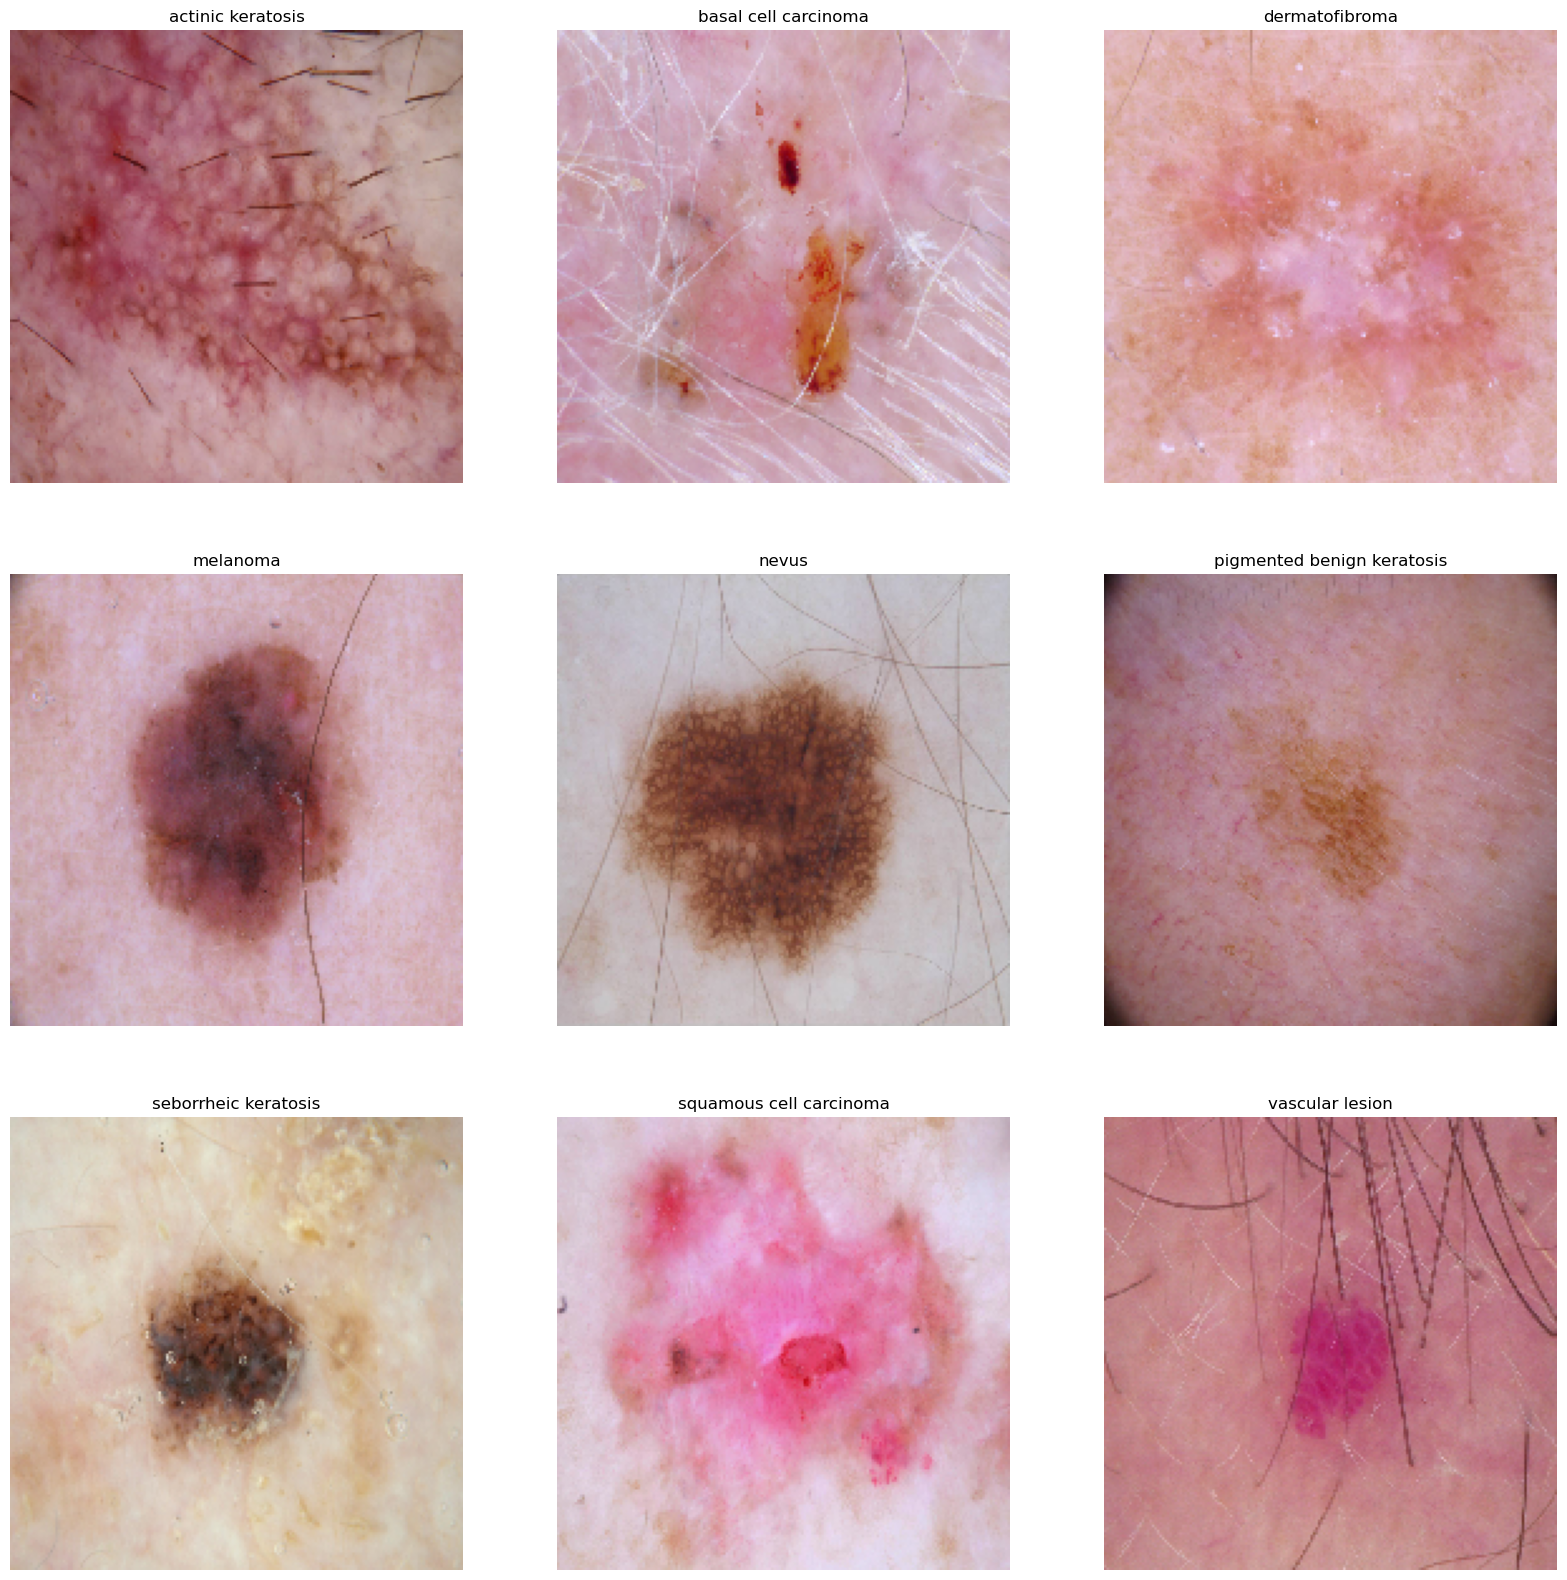

In [9]:
import matplotlib.pyplot as plt

def get_directory_files(directory: pathlib.Path):   
    file_list = [] 
    for x in directory.iterdir():
        if x.is_file():
           file_list.append(x)
    return file_list
#Dictionary for training data based in class
training_data_dict = {}
### your code goes here, you can use training or validation data to visualize
for itemClass in class_names:
    class_dir= get_directory_files(pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train"+"/"+itemClass))
    training_data_dict[itemClass]=class_dir[0]
    
from tensorflow.keras.preprocessing.image import load_img
#Visualize image 
plt.figure(figsize=(20,20))
index = 0
for itemClass in class_names:
    file_path = training_data_dict[itemClass]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(file_path,target_size=(180,180)))
    plt.title(itemClass)
    plt.axis("off")


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
#CNN Model as following


# Variables to use in the CNN module creation
INPUT_SHAPE = (180, 180, 3) 
KERNEL_SIZE = (3, 3) 
POOL_SHAPE = (2, 2)
NUM_CLASSES = len(class_names)

#Create CNN models layer by layer  
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=INPUT_SHAPE))   
# Layer 1
model.add(layers.Conv2D(16,kernel_size=KERNEL_SIZE,activation='relu'))
model.add(layers.MaxPool2D(pool_size=POOL_SHAPE))
# Layer 2
model.add(layers.Conv2D(32,kernel_size=KERNEL_SIZE,activation='relu'))
model.add(layers.MaxPool2D(pool_size=POOL_SHAPE))
# Layer 3
model.add(layers.Conv2D(64,kernel_size=KERNEL_SIZE,activation='relu'))
model.add(layers.MaxPool2D(pool_size=POOL_SHAPE))
#Flatten Layer
model.add(layers.Flatten())
#Dense Layer
model.add(layers.Dense(128,activation='relu'))
#Dense Layer with softmax activation function.
model.add(layers.Dense(NUM_CLASSES,activation='softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        1

### Train the model

In [14]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
70/70 [==============================] - 96s 978ms/step - loss: 1.7970 - accuracy: 0.3399 - val_loss: 2.3685 - val_accuracy: 0.2966
Epoch 2/20
70/70 [==============================] - 58s 829ms/step - loss: 1.5004 - accuracy: 0.4694 - val_loss: 2.5396 - val_accuracy: 0.3220
Epoch 3/20
70/70 [==============================] - 52s 736ms/step - loss: 1.4046 - accuracy: 0.5190 - val_loss: 2.0740 - val_accuracy: 0.3644
Epoch 4/20
70/70 [==============================] - 52s 739ms/step - loss: 1.3066 - accuracy: 0.5360 - val_loss: 2.2227 - val_accuracy: 0.2966
Epoch 5/20
70/70 [==============================] - 52s 737ms/step - loss: 1.3105 - accuracy: 0.5480 - val_loss: 2.0479 - val_accuracy: 0.3898
Epoch 6/20
70/70 [==============================] - 52s 740ms/step - loss: 1.1972 - accuracy: 0.5793 - val_loss: 2.6116 - val_accuracy: 0.3305
Epoch 7/20
70/70 [==============================] - 52s 741ms/step - loss: 1.1391 - accuracy: 0.5985 - val_loss: 2.6022 - val_accuracy: 0.3136

### Visualizing training results

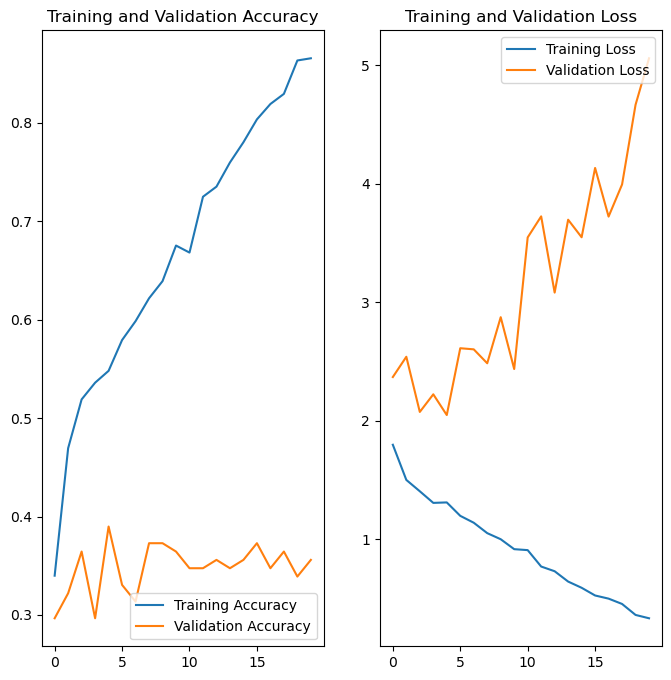

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

__<div style="background-color:#ADD8E6; color:red ;font-size:25px; height: 35px ">The model is Overfiting</div>__
- <font color='#800000'>**Training Accuracy ~ 87%**</font>
- <font color='#800000'>**Validation Accuracy ~ 40%**</font>
- <font color='#800000'>**senice the training accurecy is 87% and the validation accuracy 40% it's clear that the module is overfiting**</font>
- <font color='#800000'>**To fix this issue we will add a new augumentation layer to**</font>
- <font color='#800000'>Random Rotation</font>
- <font color='#800000'>Random Zooming</font>
- <font color='#800000'>Random Flipping</font>


### Write your findings here

In [16]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomRotation(1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(img_height, img_width,3))
  ]
)


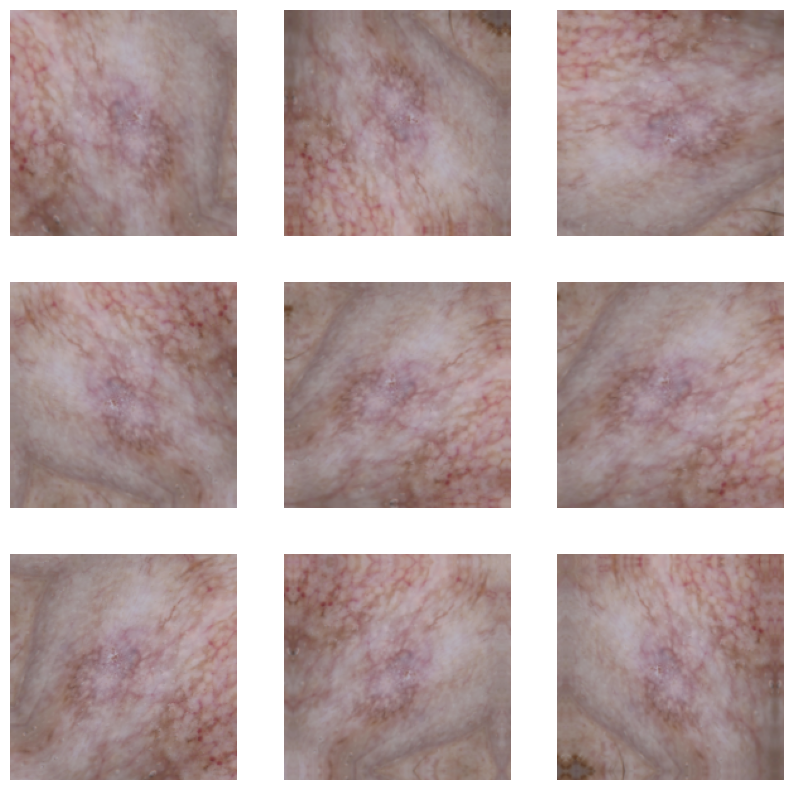

In [17]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [18]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
# Variables to use in the CNN module creation
INPUT_SHAPE = (180, 180, 3) 
KERNEL_SIZE = (3, 3) 
POOL_SHAPE = (2, 2)
NUM_CLASSES = len(class_names)

#Create CNN models layer by layer  
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=INPUT_SHAPE))   
# Layer 1
model.add(layers.Conv2D(32,kernel_size=KERNEL_SIZE,activation='relu'))
model.add(layers.MaxPool2D(pool_size=POOL_SHAPE))
# Layer 2
model.add(layers.Conv2D(64,kernel_size=KERNEL_SIZE,activation='relu'))
model.add(layers.MaxPool2D(pool_size=POOL_SHAPE))
# Dropout layer.
model.add(layers.Dropout(0.3))
# Layer 3
model.add(layers.Conv2D(128,kernel_size=KERNEL_SIZE,activation='relu'))
model.add(layers.MaxPool2D(pool_size=POOL_SHAPE))
# Dropout layer.
model.add(layers.Dropout(0.3))
#Flatten Layer
model.add(layers.Flatten())
#Dense Layer
model.add(layers.Dense(128,activation='relu'))
#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.3))
#Dense Layer with softmax activation function.
model.add(layers.Dense(NUM_CLASSES,activation='softmax'))


### Compiling the model

In [19]:
## Your code goes here
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
checkpoint = ModelCheckpoint("model.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

### Training the model

In [20]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs,callbacks=[checkpoint,earlystop])

Epoch 1/20
70/70 [==============================] - ETA: 0s - loss: 2.1402 - accuracy: 0.2349
Epoch 1: val_accuracy improved from -inf to 0.22034, saving model to model.h5
70/70 [==============================] - 123s 2s/step - loss: 2.1402 - accuracy: 0.2349 - val_loss: 2.1075 - val_accuracy: 0.2203
Epoch 2/20
70/70 [==============================] - ETA: 0s - loss: 1.8517 - accuracy: 0.3135
Epoch 2: val_accuracy improved from 0.22034 to 0.31356, saving model to model.h5
70/70 [==============================] - 118s 2s/step - loss: 1.8517 - accuracy: 0.3135 - val_loss: 2.0592 - val_accuracy: 0.3136
Epoch 3/20
70/70 [==============================] - ETA: 0s - loss: 1.6171 - accuracy: 0.4368
Epoch 3: val_accuracy improved from 0.31356 to 0.35593, saving model to model.h5
70/70 [==============================] - 117s 2s/step - loss: 1.6171 - accuracy: 0.4368 - val_loss: 2.0362 - val_accuracy: 0.3559
Epoch 4/20
70/70 [==============================] - ETA: 0s - loss: 1.5525 - accuracy: 0

### Visualizing the results

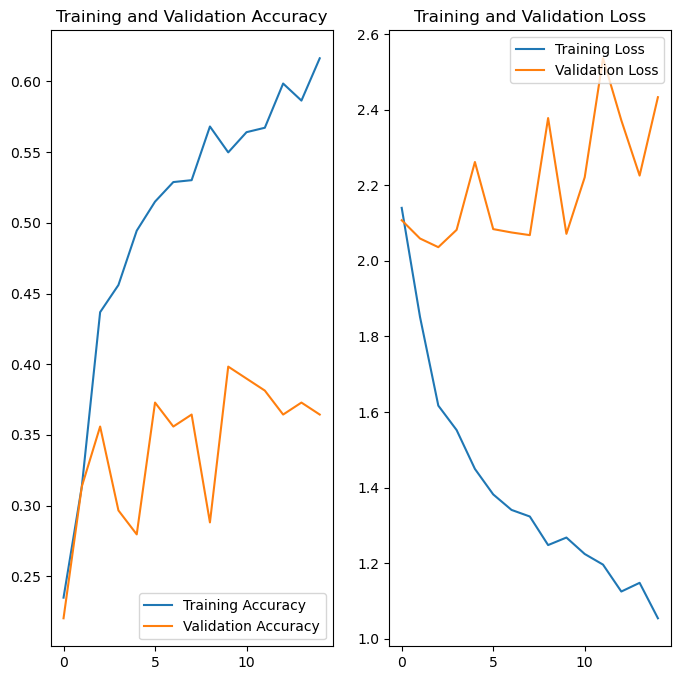

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

__<div style="background-color:#ADD8E6; color:red ;font-size:25px; height: 35px ">The model is Underfiting</div>__
- <font color='#800000'>**Training Accuracy ~ 62%**</font>
- <font color='#800000'>**Validation Accuracy ~ 40%**</font>
- <font color='#800000'>**The gap between training and testing accuracy has decreased but the overall accuracy of the model did not improve.**</font>

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<BarContainer object of 9 artists>

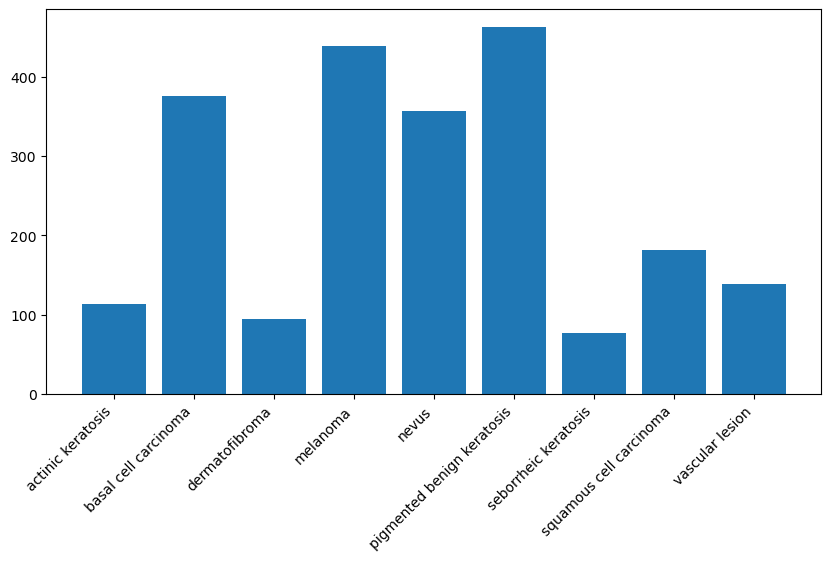

In [23]:
## Your code goes here.
plt.figure(figsize=(10, 5))
plt.xticks(rotation=45, ha="right")
plt.bar(x=class_names,height=[len(list(data_dir_train.glob(c+'/*.jpg'))) for c in class_names])

__<div style="background-color:#ADD8E6; color:red ;font-size:25px; height: 35px ">findings</div>__
- <font color='#800000'>**Class "Pigmented Benign Keratosis" has the highest number of sample images**</font>
- <font color='#800000'>**Class "Seborrheic Keratosis" has the lowest number of sample images**</font>


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [24]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [25]:
path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x28409193370>: 100%|██████████| 500/500 [00:17<00:00, 28.71 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x284063F4550>: 100%|██████████| 500/500 [00:17<00:00, 28.01 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x28406526AC0>: 100%|██████████| 500/500 [00:18<00:00, 27.67 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x284382C6730>: 100%|██████████| 500/500 [01:39<00:00,  5.01 Samples/s]                   


Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2592x1944 at 0x284382D7430>: 100%|██████████| 500/500 [01:24<00:00,  5.89 Samples/s]


Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2841E323160>: 100%|██████████| 500/500 [00:18<00:00, 26.55 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x2840006FBE0>: 100%|██████████| 500/500 [00:41<00:00, 11.96 Samples/s]


Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x28401BD1BE0>: 100%|██████████| 500/500 [00:17<00:00, 28.07 Samples/s]


Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x28406152EB0>: 100%|██████████| 500/500 [00:19<00:00, 25.43 Samples/s]                  


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [26]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

2500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [33]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_7255664e-3d05-4e3e-9451-51f78751bff4.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_96723ccd-20d3-4990-b595-f0913d1f3646.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_9cabdac6-2eed-4c46-ad92-229a9f56c0b9.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_e440156b-b21c-4149-8e1e-1ffdb2d2f802.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_e6465638-416c-4add-8e95-b78cdb260e30.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train

In [34]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [36]:
# Get Existing images in Dataframe
path_list=[]
lesion_list=[]
for name in class_names:
  for file in data_dir_train.glob(name+'/*.jpg'):
    path_list.append(str(file))
    lesion_list.append(name)

dataframe_dict_original=dict(zip(path_list,lesion_list))
original_df=pd.DataFrame(list(dataframe_dict_original.items()),columns=['Path','Label'])

In [37]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [38]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [39]:
new_df['Label'].value_counts()

melanoma                      938
basal cell carcinoma          876
actinic keratosis             614
nevus                         596
dermatofibroma                595
pigmented benign keratosis    462
squamous cell carcinoma       181
vascular lesion               139
seborrheic keratosis           77
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [40]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [43]:
data_dir_train="Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [44]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [46]:
## your code goes here
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model3 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(NUM_CLASSES)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [48]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [49]:
# View the summary of all layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 43, 43, 64)       

#### **Todo:**  Train your model

In [50]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 448s 2s/step - loss: 1.1859 - accuracy: 0.5469 - val_loss: 0.9636 - val_accuracy: 0.6273
Epoch 2/30
169/169 [==============================] - 293s 2s/step - loss: 1.0630 - accuracy: 0.5957 - val_loss: 0.9282 - val_accuracy: 0.6726
Epoch 3/30
169/169 [==============================] - 292s 2s/step - loss: 0.9822 - accuracy: 0.6187 - val_loss: 0.8158 - val_accuracy: 0.7112
Epoch 4/30
169/169 [==============================] - 305s 2s/step - loss: 0.9268 - accuracy: 0.6395 - val_loss: 0.7962 - val_accuracy: 0.7134
Epoch 5/30
169/169 [==============================] - 329s 2s/step - loss: 0.8496 - accuracy: 0.6665 - val_loss: 0.7516 - val_accuracy: 0.7320
Epoch 6/30
169/169 [==============================] - 353s 2s/step - loss: 0.8003 - accuracy: 0.6910 - val_loss: 0.7946 - val_accuracy: 0.7238
Epoch 7/30
169/169 [==============================] - 352s 2s/step - loss: 0.7660 - accuracy: 0.7101 - val_loss: 0.6934 - val_accuracy: 0.7513

#### **Todo:**  Visualize the model results

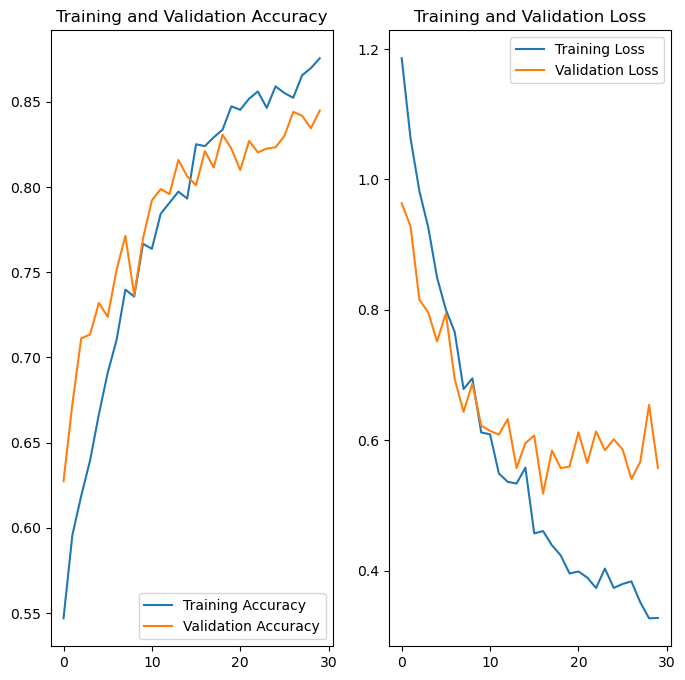

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



__<div style="background-color:#ADD8E6; color:red ;font-size:25px; height: 35px ">findings</div>__
 <font color='#800000'>**We can use this model as a final model**</font>
- <font color='#800000'>**Training Accuracy: ~88%**</font>
- <font color='#800000'>**Validation  Accuracy: ~85%**</font>
